# Correlation Analysis on Covid-19 Dataset

10/07/2023

Qintong Li

---

* Correlation analysis:
Correlation analysis is a statistical technique used in inferential statistics to examine the relationship between two or more variables. It measures the strength and direction of the linear association between variables and helps determine if there is a statistical dependence between them.


The results of correlation analysis can be interpreted in various ways:
* A strong positive correlation (close to +1) suggests that as one variable increases, the other tends to
increase as well.
* A strong negative correlation (close to -1) indicates that as one variable increases, the other tends to
decrease.
* A correlation coefficient of zero suggests no linear relationship between the variables.


Correlation analysis can help identify patterns, discover associations, and make predictions about one variable based on the other.


# Correlation Analysis Steps
1. Formulate the hypotheses based on the problem
2. Data preparation
3. Choose a statistical test
4. Perform the statistical test
5. Evaluate the results 6.Interpret the findings

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.dates as mdates
import plotly.graph_objects as go

from statsmodels.graphics.gofplots import qqplot

import seaborn as sns

In [ ]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [ ]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


* Problem: We are going to investigate whether there was a significant correlation between COVID-19 vaccination and infection rates in the UK using inferential statistics, we will follow the following steps:
* Hypotheses formulation: The null hypothesis (H0) and alternative hypothesis (H1) based on our question. For example:
 * H0: There is no significant correlation between COVID-19 vaccination rate and infection rate in the UK.
 * H1: There is a significant correlation between COVID-19 vaccination rate and infection rate in the UK.

Use the following data: https://covid.ourworldindata.org/data/owid-covid-data.csv

In [ ]:
# because we only need the data for UK, so the first step will be filtering the dataset so that only data for UK will be included
df_uk = df.loc[df['location'] == 'United Kingdom']

In [ ]:
df_uk

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
304959,GBR,Europe,United Kingdom,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
304960,GBR,Europe,United Kingdom,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
304961,GBR,Europe,United Kingdom,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,24.7,NaN,2.54,81.32,0.932,67508936.0,71.9,0.53,0.53,1.072183
304962,GBR,Europe,United Kingdom,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
304963,GBR,Europe,United Kingdom,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306241,GBR,Europe,United Kingdom,2023-07-08,24641348.0,0.0,183.429,227928.0,0.0,0.0,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
306242,GBR,Europe,United Kingdom,2023-07-09,24641348.0,0.0,145.857,227928.0,0.0,0.0,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
306243,GBR,Europe,United Kingdom,2023-07-10,24641348.0,0.0,113.143,227928.0,0.0,0.0,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
306244,GBR,Europe,United Kingdom,2023-07-11,24641348.0,0.0,71.429,227928.0,0.0,0.0,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN


Once the dataset is filtered and ready, initial stage of explaration of the dataset can be done as followed:

In [ ]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 304959 to 306245
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    1287 non-null   object 
 1   continent                                   1287 non-null   object 
 2   location                                    1287 non-null   object 
 3   date                                        1287 non-null   object 
 4   total_cases                                 1258 non-null   float64
 5   new_cases                                   1287 non-null   float64
 6   new_cases_smoothed                          1282 non-null   float64
 7   total_deaths                                1258 non-null   float64
 8   new_deaths                                  1287 non-null   float64
 9   new_deaths_smoothed                         1282 non-null   float64
 10  total

## Infection rate

>An incidence rate is typically used to measure the frequency of occurrence of **new cases** of infection within a defined population during a specified time frame.

$$\text{Rate of Infection} = \frac{\text{Number of Infections}}{\text{Population at Risk}} \times \text{constant}(k)$$

In [ ]:
df_uk_c_1 = pd.DataFrame({'date':pd.to_datetime(df_uk['date'],format = '%Y-%m-%d'),
                          'population':df_uk['population'].values,
                          'total_cases':df_uk['total_cases'].values,
                          'new_cases':df_uk['new_cases'].values,
                          'new_tests':df_uk['new_tests'].values,
                          'new_vaccinations':df_uk['new_vaccinations'].values,
                          'people_vaccinated': df_uk['people_vaccinated'].values,
                          'people_fully_vaccinated':df_uk['people_fully_vaccinated'].values,
                          'vaccination_rate':df_uk['new_vaccinations']/df_uk['population']*100,
                          'infection_rate':df_uk['new_cases'].values/df_uk['population'].values*100,
                          'test_rate':df_uk['new_tests'].values/df_uk['population'].values*100


             })

In [ ]:
df_uk_c_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 304959 to 306245
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     1287 non-null   datetime64[ns]
 1   population               1287 non-null   float64       
 2   total_cases              1258 non-null   float64       
 3   new_cases                1287 non-null   float64       
 4   new_tests                776 non-null    float64       
 5   new_vaccinations         600 non-null    float64       
 6   people_vaccinated        609 non-null    float64       
 7   people_fully_vaccinated  609 non-null    float64       
 8   vaccination_rate         600 non-null    float64       
 9   infection_rate           1287 non-null   float64       
 10  test_rate                776 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 120.7 KB


* Data preparation: Extract the relevant data for the UK from the dataset, including variables for COVID- 19 vaccination and infection rates. Ensure that the data is properly formatted and any missing values are handled appropriately. Ideally normalised the data dividing each data used by the number of the UK population.

According to the info table above, only 'population' columns doesn't need further cleaning.

In [ ]:
# df_uk_cleaned = df_uk_c_1.fillna(0)
df_uk_cleaned = df_uk_c_1.dropna()

In [ ]:
df_uk_cleaned.set_index(df_uk_cleaned['date'])

# q = df_uk_cleaned['people_vaccinated'].quantile(0.99)
# df_uk_cleaned[df['people_vaccinated']<q]

,date,population,total_cases,new_cases,new_tests,new_vaccinations,people_vaccinated,people_fully_vaccinated,vaccination_rate,infection_rate,test_rate
date,,,,,,,,,,,
2021-01-11,2021-01-11,67508936.0,3184863.0,40035.0,535804.0,165844.0,2431648.0,412167.0,0.245662,0.059303,0.793679
2021-01-12,2021-01-12,67508936.0,3222037.0,37174.0,558147.0,223726.0,2639309.0,428232.0,0.331402,0.055065,0.826775
2021-01-13,2021-01-13,67508936.0,3280629.0,58592.0,610401.0,288688.0,2918252.0,437977.0,0.427629,0.086791,0.904178
2021-01-14,2021-01-14,67508936.0,3331276.0,50647.0,668595.0,321951.0,3234946.0,443234.0,0.476901,0.075023,0.990380
2021-01-15,2021-01-15,67508936.0,3377785.0,46509.0,583179.0,345525.0,3576263.0,447442.0,0.511821,0.068893,0.863855
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,2022-05-15,67508936.0,22195698.0,6942.0,159173.0,43762.0,53382948.0,49877776.0,0.064824,0.010283,0.235781
2022-05-16,2022-05-16,67508936.0,22201818.0,6120.0,299401.0,67304.0,53387722.0,49883377.0,0.099696,0.009065,0.443498
2022-05-17,2022-05-17,67508936.0,22209791.0,7973.0,447080.0,77776.0,53393153.0,49889298.0,0.115208,0.011810,0.662253


In [ ]:
df_cleaned = df_uk_cleaned.reset_index()

In [ ]:
# df_cleaned.vaccination_rate[df_cleaned.index == 810]=df_vaccine['vaccination_rate'].median()
# df_cleaned[810:]

<ipython-input-138-5c092612bfe6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,date,population,total_cases,new_cases,new_tests,new_vaccinations,people_vaccinated,people_fully_vaccinated,vaccination_rate,infection_rate,test_rate
810,305767,2022-03-23,67508936.0,20484699.0,109286.0,829396.0,0.0,0.0,0.0,0.279434,0.161884,1.228572
811,305768,2022-03-24,67508936.0,20583793.0,99094.0,808651.0,0.0,52759213.0,49352885.0,0.000000,0.146786,1.197843
812,305769,2022-03-25,67508936.0,20677978.0,94185.0,731812.0,105446.0,52764899.0,49366211.0,0.156196,0.139515,1.084022
813,305770,2022-03-26,67508936.0,20760883.0,82905.0,549185.0,110379.0,52775615.0,49385014.0,0.163503,0.122806,0.813500
814,305771,2022-03-27,67508936.0,20833313.0,72430.0,580710.0,50449.0,52783242.0,49393056.0,0.074729,0.107290,0.860197
...,...,...,...,...,...,...,...,...,...,...,...,...
1282,306239,2023-07-08,67508936.0,24641348.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1283,306240,2023-07-09,67508936.0,24641348.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1284,306241,2023-07-10,67508936.0,24641348.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1285,306242,2023-07-11,67508936.0,24641348.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


## Variable relation exploration
After initial stage exploration of the dataset, further exploration on the correlation of varibales can be done as shown in following steps:

For example, we can explore the relavent variables in a time series to see the trend of each valuable.

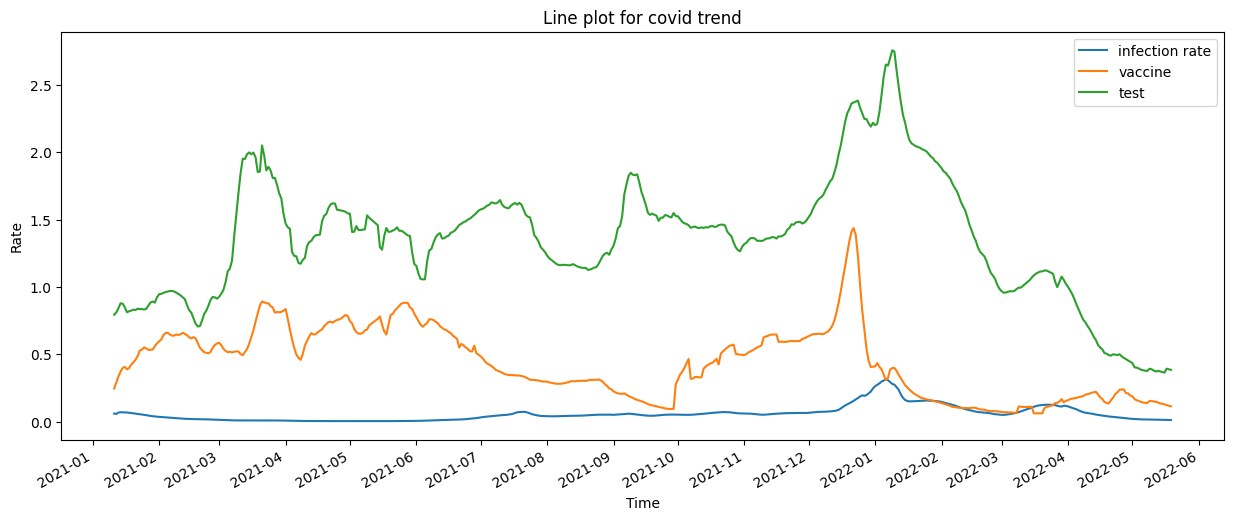

In [ ]:
fig,ax = plt.subplots(figsize = (15,6))

x_axis = df_cleaned.date
y_axis_1 = df_cleaned['vaccination_rate'].rolling(7, min_periods=1).mean()
y_axis_2 = df_cleaned['infection_rate'].rolling(7, min_periods=1).mean()
y_axis_3 = df_cleaned['test_rate'].rolling(7, min_periods=1).mean()

plt.plot(x_axis, y_axis_2,label = 'infection rate')
plt.plot(x_axis, y_axis_1,label = 'vaccine')
plt.plot(x_axis, y_axis_3,label = 'test')



ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,2,3,4,5,6,7,8,9,10,11,12)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')

plt.title('Line plot for covid trend')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()


Once the data is cleaned and ready for further analysis, we can save it as a csv file. This subset of the original dataset occupies less storage than before and is easier to use in the future work as well.

In [ ]:
# df_subset_cleaned=df_uk[['new_cases', 'new_tests', 'new_vaccinations']]
df_subset_cleaned=df_cleaned[['infection_rate', 'test_rate', 'vaccination_rate']]
df_subset_cleaned.to_csv('df_subset_cleaned.csv')

In [ ]:
df_subset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   infection_rate    489 non-null    float64
 1   test_rate         489 non-null    float64
 2   vaccination_rate  489 non-null    float64
dtypes: float64(3)
memory usage: 11.6 KB


In [ ]:
df_subset_cleaned.describe()

,infection_rate,test_rate,vaccination_rate
count,489.000000,489.000000,489.000000
mean,0.057152,1.353747,0.433640
std,0.059389,0.553218,0.302812
min,0.002121,0.229555,0.018297
25%,0.013423,0.986820,0.174607
50%,0.046897,1.303429,0.376337
75%,0.068404,1.702298,0.642798
max,0.408312,3.294742,1.574169


In [ ]:
# y_1 = df_cleaned.loc[df_cleaned['infection_rate']!=0]['infection_rate']
# y_2 = df_cleaned.loc[df_cleaned['test_rate']!=0]['test_rate']
# y_3 = df_cleaned.loc[df_cleaned['vaccination_rate']!=0]['vaccination_rate']

y_1 = df_subset_cleaned['infection_rate']
y_2 = df_subset_cleaned['test_rate']
y_3 = df_subset_cleaned['vaccination_rate']

In [ ]:
fig = make_subplots(rows=1, cols=3)
                    # ,subplot_titles=('infection_rate', 'test_rate', 'vaccination_rate'))

fig.add_trace(
    go.Box(y = y_1,name = 'infection rate'),
    row = 1,col = 1
    )

fig.add_trace(
    go.Box(y = y_2,name = 'test rate'),
    row = 1,col = 2
    )

fig.add_trace(
    go.Box(y = y_3,name = 'vaccination rate'),
    row = 1,col = 3
    )


# # Update xaxis properties
# fig.update_xaxes(title_text="xaxis 1 title", row=1, col=1)
# fig.update_xaxes(title_text="xaxis 2 title", row=1, col=2)
# fig.update_xaxes(title_text="xaxis 3 title", row=1, col=3)


# Update yaxis properties
fig.update_yaxes(title_text="Value Distribution", row=1, col=1)
# fig.update_yaxes(title_text="yaxis 2 title", row=1, col=2)
# fig.update_yaxes(title_text="yaxis 3 title", row=1, col=3)


fig.update_layout(height=500, width=800,title_text = 'Box Plots for variables')
fig.show()


In [ ]:
fig = make_subplots(rows=1, cols=3)
                    # ,subplot_titles=('infection_rate', 'test_rate', 'vaccination_rate'))

fig.add_trace(
    go.Histogram(x = y_1,name = 'infection rate'),
    row = 1,col = 1
    )

fig.add_trace(
    go.Histogram(x = y_2,name = 'test rate'),
    row = 1,col = 2
    )

fig.add_trace(
    go.Histogram(x = y_3,name = 'vaccination rate'),
    row = 1,col = 3
    )


# # Update xaxis properties
# fig.update_xaxes(title_text="xaxis 1 title", row=1, col=1)
# fig.update_xaxes(title_text="xaxis 2 title", row=1, col=2)
# fig.update_xaxes(title_text="xaxis 3 title", row=1, col=3)


# Update yaxis properties
fig.update_yaxes(title_text="# Counts", row=1, col=1)
# fig.update_yaxes(title_text="yaxis 2 title", row=1, col=2)
# fig.update_yaxes(title_text="yaxis 3 title", row=1, col=3)


fig.update_layout(height=400, width=1200,title_text = 'Histogram Plots for variables')
fig.show()


In [ ]:
# An alternative method to plot histogram using matplotlib

# # Plot distribution for infection rates and vaccination rate
# fig,ax = plt.subplots(figsize = (15,3))

# plt.subplot(131)
# plt.hist(df_cleaned['infection_rate'],bins = 50,histtype = 'step',label = 'infection rate')
# plt.legend()

# plt.subplot(133)
# plt.hist(df_cleaned['vaccination_rate'],bins = 50,histtype = 'step',label = 'vaccination rate')
# plt.legend()

# plt.subplot(132)
# plt.hist(df_cleaned['test_rate'],bins = 50,histtype = 'step',label = 'test rate')
# plt.legend()

# plt.show()

In [ ]:
fig = make_subplots(rows=1, cols=3)
                    # ,subplot_titles=('infection_rate', 'test_rate', 'vaccination_rate'))

fig.add_trace(
    go.Scatter(x=y_1, y = y_2,mode="markers",name = 'test rate vs infection rate'),
    row = 1,col = 1
    )

fig.add_trace(
    go.Scatter(x=y_1, y = y_3,mode="markers",name = 'vaccination rate vs infection rate'),
    row = 1,col = 2
    )


fig.add_trace(
    go.Scatter(x= y_2, y = y_3, mode="markers",name = 'vaccination rate vs test rate'),
    row = 1,col = 3
    )


# # Update xaxis properties
fig.update_xaxes(title_text="infection rate", row=1, col=1)
fig.update_xaxes(title_text="infection rate", row=1, col=2)
fig.update_xaxes(title_text="test rate", row=1, col=3)


# Update yaxis properties
fig.update_yaxes(title_text="test rate", row=1, col=1)
fig.update_yaxes(title_text="vaccination rate", row=1, col=2)
fig.update_yaxes(title_text="vaccination rate", row=1, col=3)


fig.update_layout(height=400, width=1200,title_text = 'Box Plots for variables')
fig.show()


Q-Q Plot
> In statistics, a Q–Q plot (quantile-quantile plot) is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other. A point (x, y) on the plot corresponds to one of the quantiles of the second distribution (y-coordinate) plotted against the same quantile of the first distribution (x-coordinate). This defines a parametric curve where the parameter is the index of the quantile interval.

If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the identity line y = x. If the distributions are linearly related, the points in the Q–Q plot will approximately lie on a line, but **not necessarily on the line y = x**. Q–Q plots can also be used as a graphical means of estimating parameters in a location-scale family of distributions.

In [ ]:
def QQ_plots(data):
  qqplot_data = qqplot(df_subset_cleaned[data], line='s').gca().lines

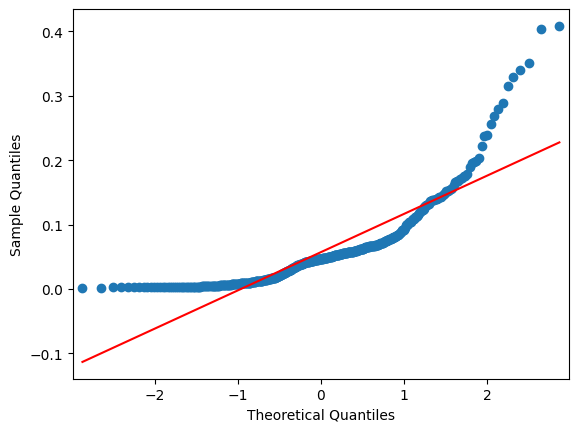

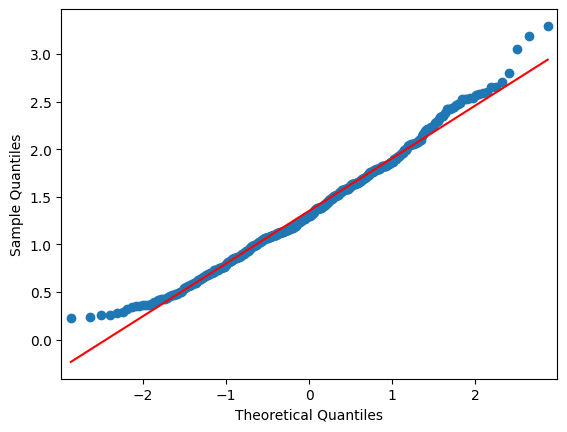

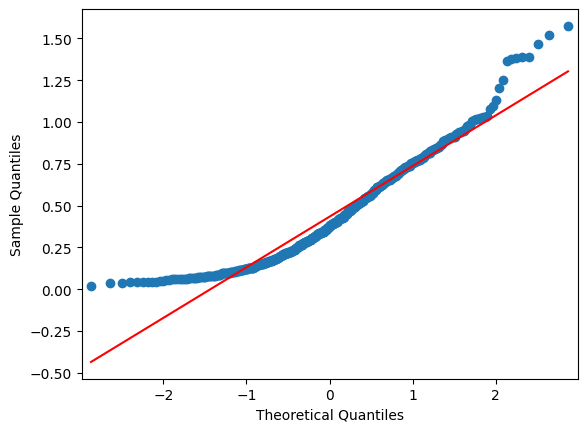

In [ ]:
QQ_plots('infection_rate')

QQ_plots('test_rate')

QQ_plots('vaccination_rate')

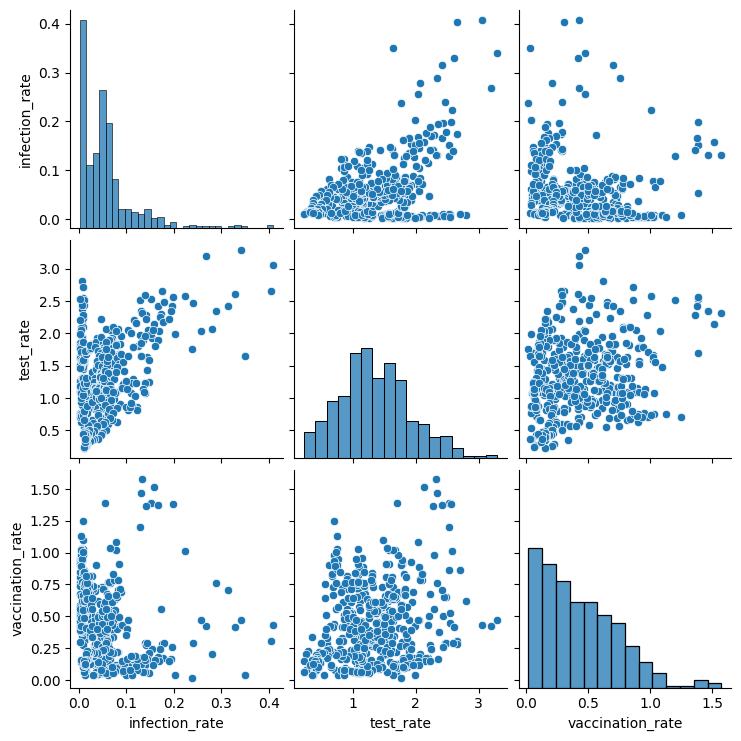

In [ ]:
sns.pairplot(df_subset_cleaned)

## Statistical Testing for correlation analysis

After conducting thorough exploration of the data and variables, statistical tools can be utilized for further analysis.


* There are 2 main correlation test we could perform to investigate the correlation of 2 variables:
  - Pearson's correlation
  - Spearman's rank correlation


To perform Pearson's correlation coefficient, the following conditions should ideally be met:
* Continuous variables: Pearson's correlation coefficient assumes that both variables are measured on a continuous scale. If one or both variables are categorical or ordinal, other measures of association like Spearman's rank correlation may be more appropriate.
* Linearity: Pearson's correlation assumes that the relationship between the two variables is approximately linear to accurately capture the correlation.
* Normally distributed variables: The variables should follow a normal distribution. However, Pearson's correlation is robust to deviations from normality unless extreme violations exist. For larger sample sizes, the normality assumption becomes less critical due to the Central Limit Theorem.
* Independence: The observations should be independent of each other (use visualization plots to check this)
* Outliers: Pearson's correlation coefficient is sensitive to outliers. Therefore, it is important to check for the presence of outliers and consider their impact on the correlation analysis. Outliers can distort the correlation coefficient and influence the significance of the association.

These conditions are ideal for performing Pearson's correlation coefficient. In practice, slight violations of these assumptions may not invalidate the results, especially if the sample size is large. However, if substantial violations occur, alternative measures of association or non-parametric tests should be considered to accurately assess the relationship between the variables.

>
  * Pearson's correlation coefficient (Parametric):
    - Measures the linear relationship between two continuous variables. -Assumptions: Variables are normally distributed and have a linear relationship.
  * Spearman's rank correlation coefficient (Non-parametric):
    - Measures the relationship between two continuous or ordinal variables. -Assumptions: Variables do not need to follow a normal distribution.

**Spearman's rank correlation is a better choice in this case since there's no variable distributed normally in this case.**

In [ ]:
result = stats.spearmanr(df_subset_cleaned['infection_rate'],df_subset_cleaned['vaccination_rate'])
print('According to Spearman\'s rank correlation test, correlation coefficient the infection rate and vaccination rate is {0:.2f} \np-value of the infection rate and vaccination rate is: {1}'.format(result.statistic,result.pvalue))


result = stats.pearsonr(df_subset_cleaned['infection_rate'],df_subset_cleaned['vaccination_rate'])
print('According to Pearson correlation test, correlation coefficient the infection rate and vaccination rate is {0:.2f} \np-value of the infection rate and vaccination rate is: {1}'.format(result.statistic,result.pvalue))

According to Spearman's rank correlation test, correlation coefficient the infection rate and vaccination rate is -0.37 
p-value of the infection rate and vaccination rate is: 5.175493185147028e-17
According to Pearson correlation test, correlation coefficient the infection rate and vaccination rate is -0.18 
p-value of the infection rate and vaccination rate is: 6.187920928064495e-05



## Correlation tests

* Evaluate the results: Assess the statistical significance of the correlation by comparing the obtained p- value with a predefined significance level (e.g., α = 0.05). If the p-value is less than the significance level, you reject the null hypothesis and conclude that there is a significant correlation between vaccination and infection rates. If the p-value is greater than the significance level, you fail to reject the null hypothesis, indicating no significant correlation.
* Interpret the findings: Based on the results, interpret the findings in the context of your question/problem. Discuss the strength and direction of the correlation and its implications.
* Note: It's important to note that correlation does not imply causation. Even if a significant correlation is found, further analysis and study are needed to establish any causal relationship between vaccination and infection rates.

In [ ]:
alpha= 0.05

if result.pvalue<alpha:
    print("The null hypothesis is rejected, there is a correlation between infection rate and vaccination rate.")
else:
    print("The null hypothesis is not rejected, there is no correlation infection rate and vaccination rate")

The null hypothesis is rejected, there is a correlation between infection rate and vaccination rate.


In [ ]:
df_subset_cleaned.corr().style.background_gradient(cmap='coolwarm')

,infection_rate,test_rate,vaccination_rate
infection_rate,1.000000,0.469384,-0.180114
test_rate,0.469384,1.000000,0.211986
vaccination_rate,-0.180114,0.211986,1.000000


The correlation coefficient -0.180114 is negative shows that there is a negative correlation between the infection rate of COVID-19 and the vaccination rate, which means the infection rate decrease when the vaccination rate increase. Vaccinations has effectively suppress the spreading of the virus.